In [136]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Reading data

In [90]:
import json
import rich.progress

with rich.progress.open("data/data.json", "rb") as file:
    json_data = [json.loads(line) for line in file]

Output()

In [139]:
label_df = pd.read_csv("data/data.info")

# Formatting data

In [95]:
all_rows = []

for list_index in range(len(json_data)):
    #print(json_data[list_index])
    for gene_id in json_data[list_index]:
        for pos in json_data[list_index][gene_id]:
            for bases in json_data[list_index][gene_id][pos]:
                reads = json_data[list_index][gene_id][pos][bases]
                avg_reads = [sum(x)/len(x) for x in zip(*reads)]
                one_row = [gene_id, int(pos), bases] + avg_reads
                all_rows.append(one_row)
    

In [146]:
df = pd.DataFrame(all_rows, columns =['transcript_id', 'transcript_position', 'bases', 
'Prev_Pos_DT', 'Prev_Pos_SD', 'Prev_Pos_Mean', 
'Curr_Pos_DT', 'Curr_Pos_SD', 'Curr_Pos_Mean',
'Next_Pos_DT', 'Next_Pos_SD', 'Next_Pos_Mean' ])

df = df.merge(label_df, how = 'left', on = ['transcript_id', 'transcript_position'])

In [164]:
df_prevs = df[["gene_id", "transcript_id", "transcript_position", "bases", "Prev_Pos_DT", "Prev_Pos_SD", "Prev_Pos_Mean", "label"]]
df_prevs["transcript_position"] = df_prevs["transcript_position"].apply(lambda x: x - 1)
df_prevs["bases"] = df_prevs["bases"].apply(lambda x: x[0:5])
df_prevs = df_prevs.rename(columns={"Prev_Pos_DT": "dt", "Prev_Pos_SD": "sd", "Prev_Pos_Mean": "mean"})

/var/folders/hp/7jp78yzd6xddfphcyv6lbj5h0000gn/T/ipykernel_42829/2707539230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prevs["transcript_position"] = df_prevs["transcript_position"].apply(lambda x: x - 1)
/var/folders/hp/7jp78yzd6xddfphcyv6lbj5h0000gn/T/ipykernel_42829/2707539230.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prevs["bases"] = df_prevs["bases"].apply(lambda x: x[0:5])


In [186]:
df_curr = df[["gene_id", "transcript_id", "transcript_position", "bases", "Curr_Pos_DT", "Curr_Pos_SD", "Curr_Pos_Mean", "label"]]
df_curr["bases"] = df_curr["bases"].apply(lambda x: x[1:6])
df_curr = df_curr.rename(columns={"Curr_Pos_DT": "dt", "Curr_Pos_SD": "sd", "Curr_Pos_Mean": "mean"})

/var/folders/hp/7jp78yzd6xddfphcyv6lbj5h0000gn/T/ipykernel_42829/1705187521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_curr["bases"] = df_curr["bases"].apply(lambda x: x[1:6])


In [165]:
df_next = df[["gene_id", "transcript_id", "transcript_position", "bases", "Next_Pos_DT", "Next_Pos_SD", "Next_Pos_Mean", "label"]]
df_next["transcript_position"] = df_next["transcript_position"].apply(lambda x: x + 1)
df_next["bases"] = df_next["bases"].apply(lambda x: x[2:7])
df_next = df_next.rename(columns={"Next_Pos_DT": "dt", "Next_Pos_SD": "sd", "Next_Pos_Mean": "mean"})

/var/folders/hp/7jp78yzd6xddfphcyv6lbj5h0000gn/T/ipykernel_42829/2907085893.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_next["transcript_position"] = df_next["transcript_position"].apply(lambda x: x + 1)
/var/folders/hp/7jp78yzd6xddfphcyv6lbj5h0000gn/T/ipykernel_42829/2907085893.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_next["bases"] = df_next["bases"].apply(lambda x: x[2:7])


In [188]:
df_positioned = pd.concat([df_prevs, df_curr, df_next],ignore_index=True)

In [191]:
df_positioned.groupby("gene_id").count()

,transcript_id,transcript_position,bases,dt,sd,mean,label
gene_id,,,,,,,
ENSG00000000003,39,39,39,39,39,39,39
ENSG00000000419,57,57,57,57,57,57,57
ENSG00000001036,111,111,111,111,111,111,111
ENSG00000001630,120,120,120,120,120,120,120
ENSG00000002330,27,27,27,27,27,27,27
...,...,...,...,...,...,...,...
ENSG00000283777,423,423,423,423,423,423,423
ENSG00000284493,84,84,84,84,84,84,84
ENSG00000284501,51,51,51,51,51,51,51


In [285]:
df_positioned["bases"].value_counts()

AAACA    10152
AAAAC     8861
AAACT     8627
GAACA     7934
GGACA     7727
         ...  
CTAAC     2413
TAGAC     2206
CGGAC     1921
AACCG     1431
CGAAC     1084
Name: bases, Length: 66, dtype: int64

In [193]:
gene_ids = list(df_positioned["gene_id"].unique())

In [208]:
train_ids, test_ids = train_test_split(gene_ids, train_size = 0.8)

In [209]:
train_df = df_positioned[df_positioned["gene_id"].isin(train_ids)]
test_df = df_positioned[df_positioned["gene_id"].isin(test_ids)]

In [286]:
train_df

,gene_id,transcript_id,transcript_position,dt,sd,mean,label,bases_AAAAC,bases_AAACA,bases_AAACC,...,bases_TAACC,bases_TAACT,bases_TAGAC,bases_TGAAC,bases_TGACA,bases_TGACC,bases_TGACT,bases_TGGAC,bases_TTAAC,bases_TTGAC
0,ENSG00000004059,ENST00000000233,243,0.008264,4.223784,123.702703,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ENSG00000004059,ENST00000000233,260,0.006609,3.216424,109.681395,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ENSG00000004059,ENST00000000233,315,0.007570,2.940541,105.475676,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ENSG00000004059,ENST00000000233,331,0.010620,6.476350,129.355000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ENSG00000004059,ENST00000000233,367,0.010701,6.415051,117.924242,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365509,ENSG00000167747,ENST00000641834,1349,0.006555,4.005616,82.004110,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
365510,ENSG00000167747,ENST00000641834,1430,0.005568,3.644638,80.497101,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
365511,ENSG00000167747,ENST00000641834,1532,0.006410,2.181562,84.190625,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
365512,ENSG00000167747,ENST00000641834,1538,0.006472,2.540877,82.289474,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [227]:
train_df = pd.get_dummies(train_df, columns = ["bases"])
test_df = pd.get_dummies(test_df, columns = ["bases"])

In [288]:
np.shape(train_df)
np.shape(test_df)

(73068, 73)

In [272]:
X_train = train_df.drop(["gene_id", "transcript_id", "label"], axis = 1).to_numpy()
y_train = train_df[["label"]].to_numpy().ravel()

X_test = test_df.drop(["gene_id", "transcript_id", "label"], axis = 1).to_numpy()
y_test = test_df[["label"]].to_numpy().ravel()

In [275]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import RandomizedSearchCV

In [273]:
counter = Counter(y_train)
print(counter)

Counter({0: 279804, 1: 12642})


In [274]:
#SMOTE OVERSAMPLING
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
counter = Counter(y_train)
print(counter)

Counter({0: 279804, 1: 279804})


In [263]:
#RANDOM OVERSAMPLING
oversample = RandomOverSampler(sampling_strategy='minority')
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [283]:
params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}

In [ ]:
#tuning_model = RandomizedSearchCV(XGBClassifier(), params, n_jobs=-1, cv=3, scoring='roc_auc')
#tuning_model.fit(X_train, y_train)

In [276]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [266]:
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [279]:
y_pred=model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9227295122351782


In [280]:
print(classification_report(y_test, y_pred))
# prioritise recall: ability to identify positives (TP / TP + FN)

              precision    recall  f1-score   support

           0       0.96      0.95      0.96     69285
           1       0.29      0.34      0.32      3783

    accuracy                           0.92     73068
   macro avg       0.63      0.65      0.64     73068
weighted avg       0.93      0.92      0.93     73068



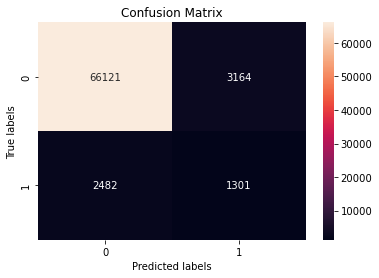

In [281]:
import seaborn as sns
import matplotlib.pyplot as plt     

cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);